# 1. Initial Settings

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Reading The CSV File

In [29]:
df = pd.read_csv("ai_job_dataset.csv")

# 3. Removing Empty Values

In [30]:
df_cleaned = df.dropna()

# 4. Filtering Data

In [31]:
filter = df_cleaned['company_location'] == 'United States'
df_cleaned = df_cleaned[filter]

# 5. Unpivoting Data

In [32]:
df_longer = df_cleaned.melt(
    id_vars="job_title",
    value_vars="salary_usd",
    var_name="salaries"
)

# 6. Pivoting Data

In [33]:
df_pivot = df_longer.pivot_table(
    index="job_title",
    columns="salaries",
    aggfunc=["mean", 'max', 'min']
)

# 7. Sorting Data

In [34]:
df_ascending_mean = df_pivot.sort_values(by=('mean', 'value', 'salary_usd'), ascending=True)
df_ascending_max = df_pivot.sort_values(by=('max', 'value', 'salary_usd'), ascending=True)
df_ascending_min = df_pivot.sort_values(by=('min', 'value', 'salary_usd'), ascending=True)

# 8. Settings For Plotting A Horizontal ABr Chart

In [35]:
colors = plt.cm.Dark2.colors
bar_height1 = 0.8
bar_height2 = 0.32
n_items = len(df_pivot.index)
y_pos = np.arange(n_items)

# 9. Plotting A Horizontal ABr Chart

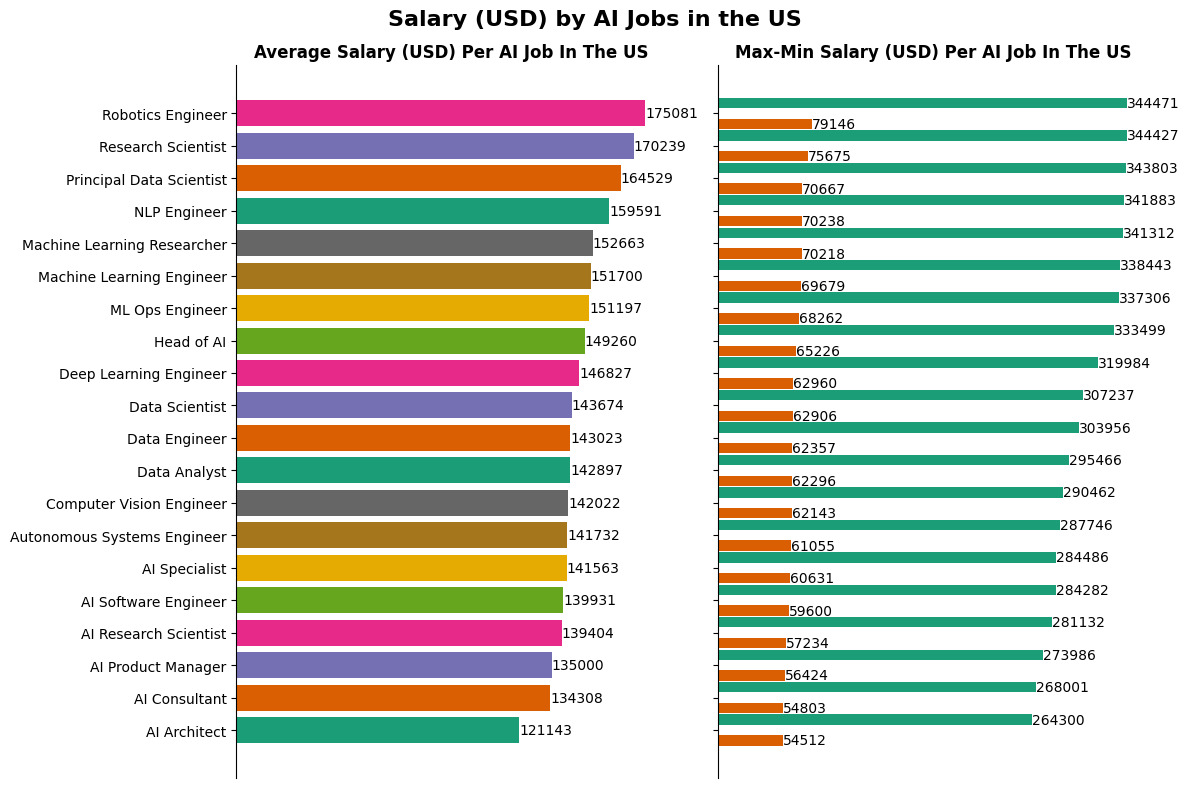

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True)

bars_mean = ax[0].barh(y_pos, df_ascending_mean['mean']['value']['salary_usd'], bar_height1, color=colors)

ax[0].bar_label(bars_mean)
ax[0].spines[['right', 'top', 'bottom']].set_visible(False)
ax[0].xaxis.set_visible(False)
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(df_pivot.index)
ax[0].set_title("Average Salary (USD) Per AI Job In The US", fontweight="bold")

bars_max = ax[1].barh(y_pos + bar_height2, df_ascending_max['max']['value']['salary_usd'], bar_height2, color=colors[0])
bars_min = ax[1].barh(y_pos - bar_height2, df_ascending_min['min']['value']['salary_usd'], bar_height2, color=colors[1])

ax[1].bar_label(bars_max)
ax[1].bar_label(bars_min)
ax[1].spines[['right', 'top', 'bottom']].set_visible(False)
ax[1].xaxis.set_visible(False)
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(df_pivot.index)
ax[1].set_title("Max-Min Salary (USD) Per AI Job In The US", fontweight="bold")

fig.suptitle("Salary (USD) by AI Jobs in the US", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()